**Estude a teoria da PCA para problemas com amostras pequenas**, onde o número de pontos de dados é menor
que a dimensão do espaço de dados (veja [3] ou a seção 12.1.4 de [1]). Escolha um banco de dados de imagens ([6],
por exemplo), converta as imagens para tons de cinza e aplique a teoria de ‘PCA para problemas com amostras pequenas’
para a redução de dimensionalidade.

1. **Seja** x a média amostral (centróide do conjunto de dados) e p1 o componente principal. Visualize o
   resultado da expressão:

   x = x + αp1

   onde α ∈ {−βλ1, 0, βλ1} com λ1 sendo o autovalor associado a p1
   e β um fator escalar (veja [5]).

2. **Estude o espectro da matriz** X^T X para realizar a redução de dimensionalidade. Visualize algumas
   imagens no espaço de dimensão reduzida.

3. **Construa um gerador de imagens** usando os d componentes principais escolhidos no item (2).



In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA

Carregando conjunto de imagens:

In [2]:
image_dir = './dataset-FEI/frontalimages_spatiallynormalized/'
images = []
image_paths = []

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    img = Image.open(img_path)
    img = img.resize((260, 360))  # Ajuste o tamanho conforme necessário
    img_array = np.array(img)
    images.append(img_array)
    image_paths.append(img_path)  # Guarda o caminho para referência futura

images = np.array(images)


In [3]:
images.shape

(400, 360, 260)

Plotando imagem exemplo:

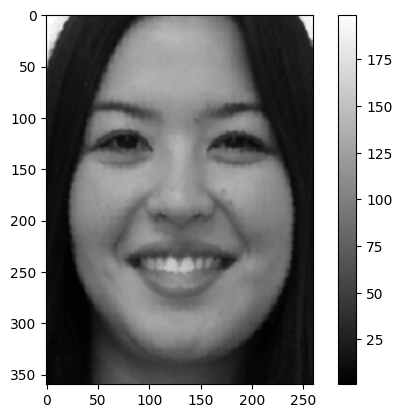

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[99], cmap='gray')
plt.colorbar()
plt.grid(False)

Vetorizando imagens:

In [5]:
# Achatar as imagens em (n_samples, height * width)
images_vetorizada = images.reshape(images.shape[0], -1)

In [6]:
images_vetorizada.shape

(400, 93600)

Calcula a matriz de dados centralizados:

In [7]:
# media global de todos os elementos
global_mean = np.mean(images_vetorizada, axis=0)

# centraliza a matriz de dados
X = images_vetorizada - global_mean

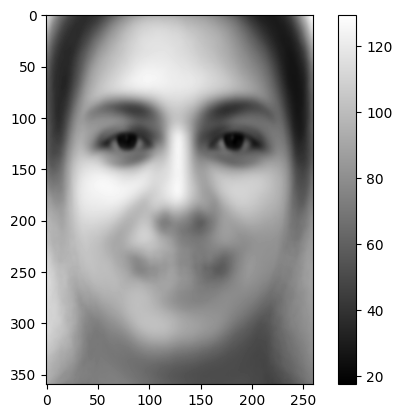

In [60]:
plt.figure()
plt.imshow(global_mean.reshape(360,260), cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
X.shape

(400, 93600)

Para o problema de Small size, encontrando autovalores e autovetores de XX^T:

In [71]:
X_T = np.transpose(X)
V = np.dot(X, X_T) / np.sqrt(len(X[0])-1)

autovalores, autovetoresV = np.linalg.eigh(V)

In [72]:
matriz_autovalores = np.diag(autovalores)

In [73]:
V.shape

(400, 400)

In [75]:
autovetoresV.shape

(400, 400)

Multiplica por X^T para encontrar autovetores de S=(X^T)X e normaliza.

In [76]:
autovetores = np.dot(X_T, autovetoresV)

In [77]:
autovetores = autovetores / np.linalg.norm(autovetores, axis=0)

In [78]:
autovetores.shape

(93600, 400)

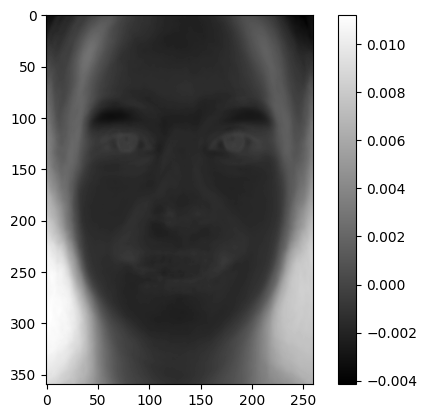

In [79]:
padroes = autovetores[:,399].reshape(360,260)
plt.figure()
plt.imshow(padroes, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
ordem_decrescente = np.argsort(autovalores)[::-1]
autovalores = autovalores[ordem_decrescente]
autovetores = autovetores[:, ordem_decrescente]

In [39]:
autovetores.shape

(93600, 400)

Análise do espectro da matriz para seleção de truncamento:

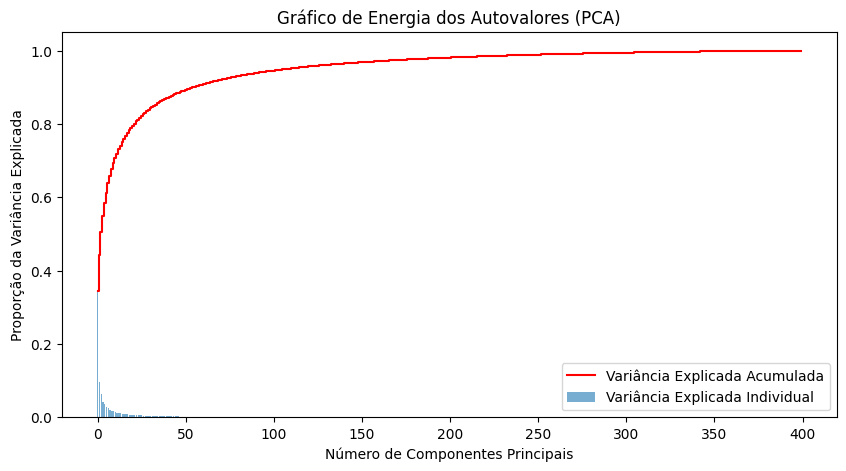

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Calcular a variância explicada
variancia_explicada = autovalores / np.sum(autovalores)

# Passo 2: Calcular a variância explicada acumulada
variancia_explicada_acumulada = np.cumsum(variancia_explicada)

# Passo 3: Plotar o gráfico de energia dos autovalores
plt.figure(figsize=(10, 5))
plt.bar(range(len(variancia_explicada)), variancia_explicada, alpha=0.6, label='Variância Explicada Individual')
plt.step(range(len(variancia_explicada_acumulada)), variancia_explicada_acumulada, where='mid', color='red', label='Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.title('Gráfico de Energia dos Autovalores (PCA)')
plt.legend(loc='best')
plt.show()


Realizando truncamento em 50:

In [41]:
import numpy as np

# Criar uma matriz de zeros 400x400
matriz = np.zeros((400, 400))

# Definir os primeiros 50 elementos da diagonal como 1
np.fill_diagonal(matriz[:50, :50], 1)

# Multiplicação da matriz de autovetores pela identidade truncada
autovetores_truncados = np.dot(autovetores, matriz)


In [44]:
autovetores_truncados.shape

(93600, 400)

In [45]:
x_tranformado = np.dot(images_vetorizada, autovetores_truncados)

In [46]:
x_tranformado.shape

(400, 400)

/tmp/ipykernel_99535/227110017.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_tranformado[:, 0], x_tranformado[:, 1], cmap='viridis', alpha=0.7)


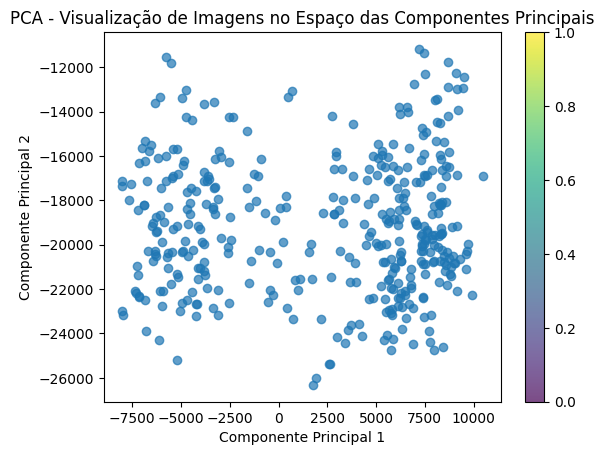

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar imagens
def plot_images(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#plt.scatter(X_transformado[:, 0], X_transformado[:, 1], c=Y, cmap='viridis', alpha=0.7)

# Supondo que X_transformado tem 2 dimensões e Y são as labels
plt.scatter(x_tranformado[:, 0], x_tranformado[:, 1], cmap='viridis', alpha=0.7)
plt.colorbar()
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Visualização de Imagens no Espaço das Componentes Principais')

# Seleciona algumas imagens para mostrar
selected_images = images[:12]  # X_original são os dados antes do PCA
#selected_titles = Y[:12]  # Rótulos correspondentes

# Plotar as imagens selecionadas
#plot_images(selected_images, h=360, w=260)  # Para MNIST, h=28 e w=28
#plt.show()


In [48]:
imagem_transformada = np.dot(x_tranformado, np.transpose(autovetores_truncados))+global_mean

In [50]:
imagem_editada = imagem_transformada[5].reshape(360, 260)

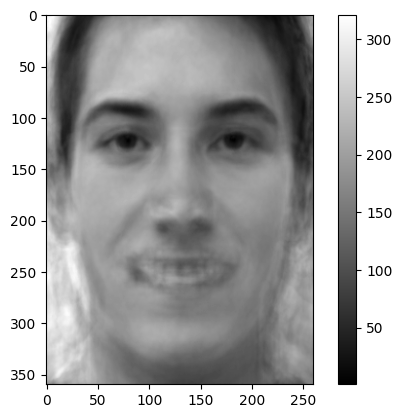

In [58]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(imagem_editada, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()